# Imports

In [1]:
import numpy as np

import pandas as pd
from sklearn.preprocessing import StandardScaler

from caits.dataset._dataset3 import CaitsArray, DatasetArray, DatasetList
from caits.filtering import filter_butterworth
from caits.fe import mean_value, std_value
from caits.fe import melspectrogram, stft, istft

## CaitsArray test

In [14]:
data = pd.read_csv("data/AirQuality.csv", sep=";", decimal=",")
print(data.iloc[:, 6:8])

      PT08.S2(NMHC)  NOx(GT)
0            1046.0    166.0
1             955.0    103.0
2             939.0    131.0
3             948.0    172.0
4             836.0    131.0
...             ...      ...
9466            NaN      NaN
9467            NaN      NaN
9468            NaN      NaN
9469            NaN      NaN
9470            NaN      NaN

[9471 rows x 2 columns]


In [15]:
vals = data.values
axis_names = {"axis_1": {name: i for i, name in enumerate(data.columns)}}

caitsArr = CaitsArray(values=vals, axis_names=axis_names)
caitsArr

            Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
   0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9  
   1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4  
   2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0  
   3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2  
   4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5  
 ...         ...       ...     ...          ...       ...       ...  
9466         nan       nan     nan          nan       nan       nan  
9467         nan       nan     nan          nan       nan       nan  
9468         nan       nan     nan          nan       nan       nan  
9469         nan       nan     nan          nan       nan       nan  
9470         nan       nan     nan          nan       nan       nan  

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
   0         1046.0    166.0        1056.0    113.0        1692.0       1268

In [16]:
caitsArr.values

array([['10/03/2004', '18.00.00', 2.6, ..., 0.7578, nan, nan],
       ['10/03/2004', '19.00.00', 2.0, ..., 0.7255, nan, nan],
       ['10/03/2004', '20.00.00', 2.2, ..., 0.7502, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=object)

In [17]:
caitsArr.axis_names

{'axis_0': {0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
  11: 11,
  12: 12,
  13: 13,
  14: 14,
  15: 15,
  16: 16,
  17: 17,
  18: 18,
  19: 19,
  20: 20,
  21: 21,
  22: 22,
  23: 23,
  24: 24,
  25: 25,
  26: 26,
  27: 27,
  28: 28,
  29: 29,
  30: 30,
  31: 31,
  32: 32,
  33: 33,
  34: 34,
  35: 35,
  36: 36,
  37: 37,
  38: 38,
  39: 39,
  40: 40,
  41: 41,
  42: 42,
  43: 43,
  44: 44,
  45: 45,
  46: 46,
  47: 47,
  48: 48,
  49: 49,
  50: 50,
  51: 51,
  52: 52,
  53: 53,
  54: 54,
  55: 55,
  56: 56,
  57: 57,
  58: 58,
  59: 59,
  60: 60,
  61: 61,
  62: 62,
  63: 63,
  64: 64,
  65: 65,
  66: 66,
  67: 67,
  68: 68,
  69: 69,
  70: 70,
  71: 71,
  72: 72,
  73: 73,
  74: 74,
  75: 75,
  76: 76,
  77: 77,
  78: 78,
  79: 79,
  80: 80,
  81: 81,
  82: 82,
  83: 83,
  84: 84,
  85: 85,
  86: 86,
  87: 87,
  88: 88,
  89: 89,
  90: 90,
  91: 91,
  92: 92,
  93: 93,
  94: 94,
  95: 95,
  96: 96,
  97: 97,
  98: 98,
  99: 99,
  100: 100

In [18]:
caitsArr.iloc[:, 3:6]

      PT08.S1(CO)  NMHC(GT)  C6H6(GT)  
   0       1360.0     150.0      11.9  
   1       1292.0     112.0       9.4  
   2       1402.0      88.0       9.0  
   3       1376.0      80.0       9.2  
   4       1272.0      51.0       6.5  
 ...          ...       ...       ...  
9466          nan       nan       nan  
9467          nan       nan       nan  
9468          nan       nan       nan  
9469          nan       nan       nan  
9470          nan       nan       nan  

CaitsArray with shape (9471, 3)

In [19]:
caitsArr.loc[1:7, "NOx(GT)":"T"]

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T  
1    103.0        1174.0     92.0        1559.0        972.0  13.3  
2    131.0        1140.0    114.0        1555.0       1074.0  11.9  
3    172.0        1092.0    122.0        1584.0       1203.0  11.0  
4    131.0        1205.0    116.0        1490.0       1110.0  11.2  
5     89.0        1337.0     96.0        1393.0        949.0  11.2  
6     62.0        1462.0     77.0        1333.0        733.0  11.3  
7     62.0        1453.0     76.0        1333.0        730.0  10.7  

CaitsArray with shape (7, 6)

In [20]:
len(caitsArr)

9471

# Dataset Array test

## Dataset

In [21]:
data_X = data.iloc[:, 2:-2]
data_X = data_X.fillna(data_X.mean())
data_y = data.iloc[:, -2:]
data_y = data_y.fillna(data_y.mean())

In [22]:
data_X

CO(GT)  PT08.S1(CO)    NMHC(GT)   C6H6(GT)  PT08.S2(NMHC)  \
0      2.600000  1360.000000  150.000000  11.900000    1046.000000   
1      2.000000  1292.000000  112.000000   9.400000     955.000000   
2      2.200000  1402.000000   88.000000   9.000000     939.000000   
3      2.200000  1376.000000   80.000000   9.200000     948.000000   
4      1.600000  1272.000000   51.000000   6.500000     836.000000   
...         ...          ...         ...        ...            ...   
9466 -34.207524  1048.990061 -159.090093   1.865683     894.595276   
9467 -34.207524  1048.990061 -159.090093   1.865683     894.595276   
9468 -34.207524  1048.990061 -159.090093   1.865683     894.595276   
9469 -34.207524  1048.990061 -159.090093   1.865683     894.595276   
9470 -34.207524  1048.990061 -159.090093   1.865683     894.595276   

         NOx(GT)  PT08.S3(NOx)     NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0     166.000000   1056.000000  113.000000   1692.000000  1268.000000   
1     103.000000   1174.000000   92.000000   1559.000000   972.000000   
2     131.000000   1140.000000  114.000000   1555.000000  1074.000000   
3     172.000000   1092.000000  122.000000   1584.000000  1203.000000   
4     131.000000   1205.000000  116.000000   1490.000000  1110.000000   
...          ...           ...         ...           ...          ...   
9466  168.616971    794.990168   58.148873   1391.479641   975.072032   
9467  168.616971    794.990168   58.148873   1391.479641   975.072032   
9468  168.616971    794.990168   58.148873   1391.479641   975.072032   
9469  168.616971    794.990168   58.148873   1391.479641   975.072032   
9470  168.616971    794.990168   58.148873   1391.479641   975.072032   

              T        RH        AH  
0     13.600000  48.90000  0.757800  
1     13.300000  47.70000  0.725500  
2     11.900000  54.00000  0.750200  
3     11.000000  60.00000  0.786700  
4     11.200000  59.60000  0.788800  
...         ...       ...       ...  
9466   9.778305  39.48538 -6.837604  
9467   9.778305  39.48538 -6.837604  
9468   9.778305  39.48538 -6.837604  
9469   9.778305  39.48538 -6.837604  
9470   9.778305  39.48538 -6.837604  

[9471 rows x 13 columns]

In [23]:
data_y

Unnamed: 15  Unnamed: 16
0             NaN          NaN
1             NaN          NaN
2             NaN          NaN
3             NaN          NaN
4             NaN          NaN
...           ...          ...
9466          NaN          NaN
9467          NaN          NaN
9468          NaN          NaN
9469          NaN          NaN
9470          NaN          NaN

[9471 rows x 2 columns]

In [24]:
data_X_vals = data_X.values
data_X_axis_names = {"axis_1": {name: i for i, name in enumerate(list(data_X.columns))}}
data_y_vals = data_y.values
data_y_axis_names = {"axis_1": {name: i for i, name in enumerate((data_y.columns))}}
data_X = CaitsArray(values=data_X_vals, axis_names=data_X_axis_names)
data_y = CaitsArray(values=data_y_vals, axis_names=data_y_axis_names)
datasetArrayObj = DatasetArray(data_X, data_y)

In [25]:
len(datasetArrayObj)

9471

In [26]:
datasetArrayObj

DatasetArray object with 9471 instances.

## Indexing

In [27]:
datasetArrayObj[3]

(       CO(GT)     2.2
   PT08.S1(CO)  1376.0
      NMHC(GT)    80.0
      C6H6(GT)     9.2
 PT08.S2(NMHC)   948.0
       NOx(GT)   172.0
  PT08.S3(NOx)  1092.0
       NO2(GT)   122.0
  PT08.S4(NO2)  1584.0
   PT08.S5(O3)  1203.0
             T    11.0
            RH    60.0
            AH  0.7867
 
 CaitsArray with shape (13,),
 Unnamed: 15  nan
 Unnamed: 16  nan
 
 CaitsArray with shape (2,))

In [28]:
datasetArrayObj.y

      Unnamed: 15  Unnamed: 16  
   0          nan          nan  
   1          nan          nan  
   2          nan          nan  
   3          nan          nan  
   4          nan          nan  
 ...          ...          ...  
9466          nan          nan  
9467          nan          nan  
9468          nan          nan  
9469          nan          nan  
9470          nan          nan  

CaitsArray with shape (9471, 2)

In [29]:
for i, row in enumerate(datasetArrayObj):
    print(i)
    # print(row)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [32]:
for i, batch in enumerate(datasetArrayObj.batch(10)):
    print(batch)
    # print(i)

(   CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0     2.6       1360.0     150.0      11.9         1046.0    166.0  
1     2.0       1292.0     112.0       9.4          955.0    103.0  
2     2.2       1402.0      88.0       9.0          939.0    131.0  
3     2.2       1376.0      80.0       9.2          948.0    172.0  
4     1.6       1272.0      51.0       6.5          836.0    131.0  
5     1.2       1197.0      38.0       4.7          750.0     89.0  
6     1.2       1185.0      31.0       3.6          690.0     62.0  
7     1.0       1136.0      31.0       3.3          672.0     62.0  
8     0.9       1094.0      24.0       2.3          609.0     45.0  
9     0.6       1010.0      19.0       1.7          561.0   -200.0  

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0        1056.0    113.0        1692.0       1268.0  13.6  48.9  
1        1174.0     92.0        1559.0        972.0  13.3  47.7  
2        1140.0    114.0        1555.0 

In [31]:
train_obj, test_obj = datasetArrayObj.train_test_split()

In [33]:
len(train_obj), len(test_obj)

(7576, 1895)

In [34]:
newDatasetArrayObj = train_obj + test_obj
len(newDatasetArrayObj)

9471

In [35]:
train_obj, test_obj = datasetArrayObj.train_test_split(random_state=42)

In [36]:
train_obj.X

      CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
 774     0.7        840.0      31.0       1.6          556.0     41.0  
4625     2.1       1083.0    -200.0      10.2          984.0    251.0  
6214     3.4       1374.0    -200.0      17.4         1222.0    602.0  
6465     1.0        884.0    -200.0       3.0          651.0   -200.0  
2362  -200.0        804.0    -200.0       3.3          668.0     32.0  
 ...     ...          ...       ...       ...            ...      ...  
4783     2.5       1063.0    -200.0      11.7         1040.0    341.0  
5208  -200.0        981.0    -200.0      10.1          983.0   -200.0  
3232     2.4       1250.0    -200.0      15.5         1166.0    186.0  
5704     3.7       1341.0    -200.0      21.0         1323.0    499.0  
9129     1.2       1167.0    -200.0       6.4          829.0    202.0  

      PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
 774        1474.0     58.0        1094.0        366.0  13.7  38

In [37]:
train_obj.y

      Unnamed: 15  Unnamed: 16  
 774          nan          nan  
4625          nan          nan  
6214          nan          nan  
6465          nan          nan  
2362          nan          nan  
 ...          ...          ...  
4783          nan          nan  
5208          nan          nan  
3232          nan          nan  
5704          nan          nan  
9129          nan          nan  

CaitsArray with shape (7576, 2)

In [38]:
newDatasetArrayObj = train_obj + test_obj
newDatasetArrayObj

DatasetArray object with 9471 instances.

In [39]:
newDatasetArrayObj.X

                CO(GT)         PT08.S1(CO)             NMHC(GT)            C6H6(GT)      PT08.S2(NMHC)            NOx(GT)  \
   0               0.7               840.0                 31.0                 1.6              556.0               41.0  
   1               2.1              1083.0               -200.0                10.2              984.0              251.0  
   2               3.4              1374.0               -200.0                17.4             1222.0              602.0  
   3               1.0               884.0               -200.0                 3.0              651.0             -200.0  
   4            -200.0               804.0               -200.0                 3.3              668.0               32.0  
 ...               ...                 ...                  ...                 ...                ...                ...  
9466  -34.207523778989  1048.9900609169606  -159.09009297851875  1.8656834455487867  894.5952762637597  168.6169712514695  
9467  -

In [40]:
datasetArrayObj.to_dict()

{'X':                 CO(GT)         PT08.S1(CO)             NMHC(GT)            C6H6(GT)      PT08.S2(NMHC)            NOx(GT)  \
    0               2.6              1360.0                150.0                11.9             1046.0              166.0  
    1               2.0              1292.0                112.0                 9.4              955.0              103.0  
    2               2.2              1402.0                 88.0                 9.0              939.0              131.0  
    3               2.2              1376.0                 80.0                 9.2              948.0              172.0  
    4               1.6              1272.0                 51.0                 6.5              836.0              131.0  
  ...               ...                 ...                  ...                 ...                ...                ...  
 9466  -34.207523778989  1048.9900609169606  -159.09009297851875  1.8656834455487867  894.5952762637597  168.6169712514

In [41]:
datasetArrayObj.apply(filter_butterworth, fs=200, filter_type='lowpass', cutoff_freq=50)

array([[ 2.60027232e+00,  1.36000482e+03,  1.50014594e+02, ...,
         1.36002492e+01,  4.88987796e+01,  7.57799735e-01],
       [-1.42059319e+00,  1.34921145e+03,  1.14210394e+02, ...,
         1.29907604e+01,  4.92156870e+01,  7.34216981e-01],
       [ 2.11795883e+00,  1.36625793e+03,  9.01143291e+01, ...,
         1.20434872e+01,  5.34476279e+01,  7.47262977e-01],
       ...,
       [-3.42075238e+01,  1.04899006e+03, -1.59090093e+02, ...,
         9.77830501e+00,  3.94853799e+01, -6.83760364e+00],
       [-3.42075238e+01,  1.04899006e+03, -1.59090093e+02, ...,
         9.77830501e+00,  3.94853799e+01, -6.83760364e+00],
       [-3.42075238e+01,  1.04899006e+03, -1.59090093e+02, ...,
         9.77830501e+00,  3.94853799e+01, -6.83760364e+00]])

In [42]:
shuffled_dataset = datasetArrayObj.shuffle()

In [46]:
datasetArrayObj.X, datasetArrayObj.y

(                CO(GT)         PT08.S1(CO)             NMHC(GT)            C6H6(GT)      PT08.S2(NMHC)            NOx(GT)  \
    0               2.6              1360.0                150.0                11.9             1046.0              166.0  
    1               2.0              1292.0                112.0                 9.4              955.0              103.0  
    2               2.2              1402.0                 88.0                 9.0              939.0              131.0  
    3               2.2              1376.0                 80.0                 9.2              948.0              172.0  
    4               1.6              1272.0                 51.0                 6.5              836.0              131.0  
  ...               ...                 ...                  ...                 ...                ...                ...  
 9466  -34.207523778989  1048.9900609169606  -159.09009297851875  1.8656834455487867  894.5952762637597  168.6169712514695  

In [47]:
shuffled_dataset.X, shuffled_dataset.y

(      CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
 3259     1.2       1058.0    -200.0       6.5          833.0     47.0  
 3987     1.4        928.0    -200.0       6.5          837.0     62.0  
  965  -200.0        985.0    -200.0       5.3          780.0   -200.0  
 3433     1.6       1091.0    -200.0      10.2          987.0     71.0  
  494     4.1       1580.0     644.0      19.9         1295.0    230.0  
  ...     ...          ...       ...       ...            ...      ...  
 8174     2.3       1233.0    -200.0      11.4         1030.0    388.0  
 6038     3.3       1234.0    -200.0      15.4         1161.0    664.0  
 5385     1.5        994.0    -200.0       6.0          812.0   -200.0  
 2708     1.8       1158.0    -200.0      10.1          983.0    101.0  
 8042     1.9       -200.0    -200.0    -200.0         -200.0    275.0  
 
       PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)       T      RH  \
 3259         804.0     53.0        1623.0    

# DatasetList

## Dataset

In [2]:
from caits.loading import csv_loader

data = csv_loader("data/GestureSet_small")

Loading CSV files: 100%|██████████| 924/924 [00:00<00:00, 1360.12it/s]


In [3]:
X, y, id = data["X"], data["y"], data["id"]
caitsX = [CaitsArray(values=x.values, axis_names={
    "axis_1": {
        col: i for i, col in enumerate(x.columns)
    }
}) for x in X]
type(caitsX[0]), type(y[0]), type(id[0])

(caits.dataset._dataset3.CaitsArray, str, str)

In [4]:
datasetListObj = DatasetList(caitsX, y, id)
datasetListObj

DatasetList object with 924 instances.

In [5]:
len(datasetListObj)

924

## Indexing

In [ ]:
datasetListObj[3]

In [ ]:
datasetListObj[3:15]

In [ ]:
datasetListObj[[3,8,16,107]]

In [ ]:
datasetListObj[1, 4]

In [ ]:
tmp = datasetListObj[1, 2:5]
tmp, tmp.X[0].shape

In [ ]:
tmp = datasetListObj[1, [3,4]]
tmp, tmp.X[0].shape

In [ ]:
datasetListObj.X[0].axis_names["axis_1"]

In [ ]:
tmp = datasetListObj[1, "acc_x_axis_g"]
tmp, tmp.X[0].shape, tmp.X[0], tmp.y, tmp._id

In [ ]:
tmp = datasetListObj[1, ["acc_x_axis_g", "acc_z_axis_g"]]
tmp, tmp.X[0].shape

In [ ]:
tmp = datasetListObj[1, "acc_x_axis_g":"gyr_x_axis_deg/s"]
tmp, tmp.X[0].shape, tmp.X[0]

In [ ]:
datasetListObj[1:4, 1]

In [ ]:
datasetListObj[1:4, 3:5]

In [ ]:
datasetListObj[1:4, [1,5]]

In [ ]:
datasetListObj[1:4, "acc_x_axis_g"]

In [ ]:
datasetListObj[1:4, ["acc_z_axis_g", "gyr_z_axis_deg/s"]]

In [ ]:
tmp = datasetListObj[1:4, "acc_x_axis_g":"gyr_x_axis_deg/s"]
tmp, tmp.X[0].shape, tmp.X[0]

In [ ]:
tmp1 = datasetListObj[:100, "acc_x_axis_g":"acc_z_axis_g"]
tmp2 = datasetListObj[:100, "gyr_x_axis_deg/s":"gyr_y_axis_deg/s"]
len(tmp1), len(tmp2), tmp1.X[0].shape, tmp2.X[0].shape, {axis: len(names) for axis, names in tmp1.X[0].axis_names.items()}, {axis: len(names) for axis, names in tmp2.X[0].axis_names.items()}

In [ ]:
axis_names = {**tmp1.X[0].axis_names["axis_1"], **tmp2.X[0].axis_names["axis_1"]}
axis_names

In [ ]:
tmp = tmp1.unify([tmp2], axis=1)
tmp, tmp.X[0].shape, tmp.X[0]

In [ ]:
tmp1 = datasetListObj[:100, ["acc_x_axis_g"]]
tmp2 = datasetListObj[:100, ["acc_y_axis_g"]]
tmp3 = datasetListObj[:100, ["acc_z_axis_g", "gyr_z_axis_deg/s"]]
tmp1.X[0], tmp2.X[0], tmp3.X[0]

In [ ]:
tmp = tmp1.unify([tmp2, tmp3], axis_names={"axis_1": {"col1": 0, "col2": 1, "col3": 2, "col4": 3}}, axis=1)
tmp, tmp.X[0].shape, tmp.X[0].axis_names

In [ ]:
tmp[:, ["col1", "col3"]].X

In [ ]:
for i, row in enumerate(datasetListObj):
    print(i)

In [ ]:
for i, batch in enumerate(datasetListObj.batch(10)):
    print(batch)

In [ ]:
train_obj, test_obj = datasetListObj.train_test_split()

In [ ]:
len(train_obj), len(test_obj)

In [ ]:
train_obj.X

In [ ]:
newDatasetListObj = train_obj + test_obj
len(newDatasetListObj)

In [ ]:
train_obj, test_obj = datasetListObj.train_test_split(random_state=42)
len(train_obj), len(test_obj)

In [ ]:
newDatasetListObj = train_obj + test_obj
len(newDatasetListObj)

In [ ]:
datasetListObj.apply(filter_butterworth, fs=200, filter_type='lowpass', cutoff_freq=50)

# Pipeline steps test

## DatasetArray

In [ ]:
from caits.transformers._func_transformer_v2 import FunctionTransformer
from caits.transformers._feature_extractor_v2 import FeatureExtractor
from caits.transformers._func_transformer_2d_v2 import FunctionTransformer2D
from caits.transformers._feature_extractor_2d_v2 import FeatureExtractor2D
from caits.transformers._sliding_window_v2 import SlidingWindow

functionTransformer = FunctionTransformer(filter_butterworth, fs=200, filter_type='lowpass', cutoff_freq=50)
transformedArray = functionTransformer.fit_transform(datasetArrayObj)

In [ ]:
datasetArrayObj.X.values

In [ ]:
transformedArray.X.values

In [ ]:
featureExtractor = FeatureExtractor([
    {
        "func": mean_value,
        "params": {}
    },
    {
        "func": std_value,
        "params": {
            "ddof": 0
        }
    }
])

In [ ]:
tmp = featureExtractor.fit_transform(datasetArrayObj)
tmp.keys(), len(tmp["mean_value"]), type(tmp["mean_value"]), tmp["mean_value"].shape

In [ ]:
datasetArrayObj.dict_to_dataset(tmp).values

In [ ]:
featureExtractor2D = FeatureExtractor2D(melspectrogram, n_fft=100, hop_length=10)
tmp = featureExtractor2D.fit_transform(datasetArrayObj)

In [ ]:
tmp.X.shape

In [ ]:
featureExtractor2D = FeatureExtractor2D(stft, n_fft=100, hop_length=10)
tmp1 = featureExtractor2D.fit_transform(datasetArrayObj)

In [ ]:
tmp1.X.shape

In [ ]:
functionTransformer = FunctionTransformer2D(istft, n_fft=100, hop_length=10)
tmp2 = functionTransformer.fit_transform(tmp1)

In [ ]:
tmp2.X.shape

In [ ]:
slidingWindow = SlidingWindow(window_size=10, overlap=5)
tmp = slidingWindow.fit_transform(datasetArrayObj)

In [ ]:
len(tmp), tmp.X[0].shape

# DatasetList

In [ ]:
functionTransformer = FunctionTransformer(filter_butterworth, fs=200, filter_type='highpass', cutoff_freq=50)
transformedList = functionTransformer.fit_transform(datasetListObj)
transformedList

In [ ]:
datasetListObj.X[0].values

In [ ]:
transformedList.X[0].values

In [ ]:
tmp = featureExtractor.fit_transform(datasetListObj)
tmp.keys(), len(tmp["mean_value"]), type(tmp["mean_value"][0]), tmp["mean_value"][0].shape

In [ ]:
tmpToDataset = datasetListObj.dict_to_dataset(tmp)

In [ ]:
tmpToDataset[0]

In [ ]:
featureExtractor2D = FeatureExtractor2D(melspectrogram, n_fft=10, hop_length=10)
tmp = featureExtractor2D.fit_transform(datasetListObj)

In [ ]:
tmp

In [ ]:
featureExtractor2D = FeatureExtractor2D(stft, n_fft=10, hop_length=10)
tmp = featureExtractor2D.fit_transform(datasetListObj)

In [ ]:
tmp.X[900].values.shape

In [ ]:
functionTransformer = FunctionTransformer2D(istft, hop_length=10)
tmp = functionTransformer.fit_transform(tmp)

In [ ]:
tmp.X[100].shape, datasetListObj.X[100].shape

In [6]:
from caits.transformers._sliding_window_v2 import SlidingWindow

slidingWindow = SlidingWindow(window_size=10, overlap=5)
tmp = slidingWindow.fit_transform(datasetListObj)

In [7]:
len(tmp.X), len(tmp.y), len(tmp._id)

(25223, 25223, 25223)

In [8]:
tmp.to_numpy()

([array([[ 6.50000e-01,  2.27000e-01,  7.65000e-01, -4.82930e+01,
          -1.87800e+01, -1.81710e+01],
         [ 8.50000e-01,  1.75000e-01,  6.49000e-01, -5.06100e+01,
           1.28050e+01, -2.71340e+01],
         [ 9.80000e-01,  1.34000e-01,  5.07000e-01, -5.22560e+01,
           3.03660e+01, -3.03660e+01],
         [ 1.11800e+00,  1.01000e-01,  4.06000e-01, -5.32930e+01,
           2.58540e+01, -2.50000e+01],
         [ 1.24300e+00,  9.00000e-02,  3.56000e-01, -5.46950e+01,
           6.22000e+00, -1.42680e+01],
         [ 1.29700e+00,  8.40000e-02,  3.71000e-01, -5.16460e+01,
          -2.11590e+01,  9.15000e-01],
         [ 1.31500e+00,  6.50000e-02,  4.77000e-01, -4.70120e+01,
          -5.34760e+01,  1.84150e+01],
         [ 1.31200e+00,  8.30000e-02,  6.12000e-01, -4.16460e+01,
          -8.26220e+01,  3.62200e+01],
         [ 1.16700e+00,  1.01000e-01,  7.11000e-01, -3.60980e+01,
          -9.99390e+01,  5.10980e+01],
         [ 1.06300e+00,  1.03000e-01,  7.08000e-01, -2.

In [9]:
tmp_flat = tmp.flatten()
tmp_flat

DatasetList object with 25223 instances.

In [10]:
from caits.transformers._data_converters_v2 import DatasetToArray

dataFlatten = DatasetToArray(flatten=True, dtype=np.float64)

dataFlatten.fit(tmp)


DatasetToArray(dtype=<class 'numpy.float64'>, flatten=True)

In [11]:
tmp_conv = dataFlatten.transform(tmp)
tmp_conv

DatasetList object with 25223 instances.

In [12]:
tmp_conv.X

            0       1      2        3        4        5  \
    0    0.65   0.227  0.765  -48.293   -18.78  -18.171  
    1   1.297   0.084  0.371  -51.646  -21.159    0.915  
    2   1.003   0.145  0.685  -17.256  -99.207   60.549  
    3    0.22    0.27  0.234   -2.134   15.244    7.683  
    4   1.211  -0.034  0.565  -20.793  -61.585  -17.744  
  ...     ...     ...    ...      ...      ...      ...  
25218  -0.482  -0.773  0.492    -1.22  -37.012    4.817  
25219  -0.422  -0.764  0.415   -1.646  -41.951   12.073  
25220  -0.465  -0.777  0.471   -2.012  -42.378   14.817  
25221  -0.385  -0.728  0.515   -2.561   -33.11   26.098  
25222  -0.336  -0.667   0.62   -2.439  -37.683   54.817  

            6       7      8        9       10       11  \
    0    0.85   0.175  0.649   -50.61   12.805  -27.134  
    1   1.315   0.065  0.477  -47.012  -53.476   18.415  
    2   0.804   0.181  0.623   -9.024  -80.305   56.098  
    3   0.254   0.237  0.218   -4.756    0.671   -4.634  
    4    1.

In [13]:
from caits.transformers._sklearn_wrapper import SklearnWrapper
scaler = SklearnWrapper(StandardScaler)

tmp_flat_scaled = scaler.fit_transform(tmp_conv)

In [14]:
scaler.fitted_transformer_.mean_.shape, scaler.fitted_transformer_.var_.shape

((60,), (60,))

In [15]:
# tmp_flat_scaled.X[0].shape, len(tmp_flat_scaled.y), len(tmp_flat_scaled._id)
tmp_flat_scaled.X

                          0                     1                     2                      3                     4                     5  \
    0    0.9579952891487599   -0.4296959147990568    0.8311960675293498    -1.6293774259893985  -0.17884054824749038  -0.37450881718299317  
    1    1.8604920480664369   -0.6327993249567408  -0.02207282206154568     -1.744961598879451  -0.20194890567365328   0.11389415114692919  
    2    1.4503930571517583   -0.5461608073370294    0.6579435011149549    -0.5594740636307491   -0.9600662156346301    1.6399039286480603  
    3    0.3581906425728692  -0.36862286139499784   -0.3187678420461971  -0.038190478052648934   0.15165073088986458   0.28708451527020873  
    4    1.7405311187512589   -0.8003951459260187    0.3980646514933621    -0.6814010602045978   -0.5946258528405565  -0.36358206105405694  
  ...                   ...                   ...                   ...                    ...                   ...                   ...  
25218    -0.

In [16]:
from caits.transformers._data_converters_v2 import ArrayToDataset

shape = tmp.X[0].shape

dataInverseFlatten = ArrayToDataset(
    shape=shape,
    dtype=np.float64,
    axis_names={"axis_1": tmp.X[0].axis_names["axis_1"]}
)

dataInverseFlatten.fit(tmp_flat_scaled)

tmp_conv_inv = dataInverseFlatten.transform(tmp_flat_scaled)



In [17]:
tmp_conv_inv.X[0]

         acc_x_axis_g         acc_y_axis_g           acc_z_axis_g     gyr_x_axis_deg/s      gyr_y_axis_deg/s      gyr_z_axis_deg/s  
0  0.9579952891487599  -0.4296959147990568     0.8311960675293498  -1.6293774259893985  -0.17884054824749038  -0.37450881718299317  
1  1.2398845144685648  -0.5026567961985033     0.5827143249476336   -1.707454017653691   0.13050970081459243   -0.5999962379612934  
2  1.4260075990471948  -0.5602352061504804     0.2748709607266363   -1.762053581463199   0.30344797646419186   -0.6785009129254501  
3  1.6223694413335503   -0.607248616094896    0.05589989240862817  -1.7901961823373735    0.2615921307569602   -0.5364522868928431  
4  1.7984332367864762  -0.6236748886062441   -0.05202080207197799  -1.8368770201520104   0.07287951610133946   -0.2583745541173984  
5  1.8733050896707304  -0.6316519023187789  -0.019120146598946206  -1.7349921454999615  -0.19062235962407878    0.1323620968073715  
6  1.9007851923676502  -0.6564646749795784    0.21173897688556237  -1

In [18]:
tmp_train, tmp_test, = tmp.train_test_split(random_state=42)
tmp_train, tmp_test, type(tmp_train.X[0]), type(tmp_test.X[0])

(DatasetList object with 20178 instances.,
 DatasetList object with 5045 instances.,
 caits.dataset._dataset3.CaitsArray,
 caits.dataset._dataset3.CaitsArray)

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer, MinMaxScaler

pipeline = Pipeline(
    [
        ("conv", dataFlatten),
        ("scaler", scaler),
        ("conv_inv", dataInverseFlatten),
    ]
)

In [20]:
pipeline.fit(tmp_train)

Pipeline(steps=[('conv',
                 DatasetToArray(dtype=<class 'numpy.float64'>, flatten=True)),
                ('scaler',
                 SklearnWrapper(transformer=<class 'sklearn.preprocessing._data.StandardScaler'>,
                                transformer_kwargs={})),
                ('conv_inv',
                 ArrayToDataset(axis_names={'axis_1': {'acc_x_axis_g': 0,
                                                       'acc_y_axis_g': 1,
                                                       'acc_z_axis_g': 2,
                                                       'gyr_x_axis_deg/s': 3,
                                                       'gyr_y_axis_deg/s': 4,
                                                       'gyr_z_axis_deg/s': 5}},
                                axis_names_={'axis_1': {'acc_x_axis_g': 0,
                                                        'acc_y_axis_g': 1,
                                                        'acc_z_axis_g': 2,
                                                        'gyr_x_axis_deg/s': 3,
                                                        'gyr_y_axis_deg/s': 4,
                                                        'gyr_z_axis_deg/s': 5}},
                                dtype=<class 'numpy.float64'>,
                                dtype_=<class 'numpy.float64'>, shape=(10, 6),
                                shape_=(10, 6)))])

In [21]:
pipeline.named_steps["scaler"].fitted_transformer_.mean_

array([-0.03527817,  0.5280725 ,  0.38032635, -0.97728898, -0.57514625,
       -3.45386956, -0.03547145,  0.52826797,  0.37967876, -0.90655278,
       -0.80213901, -3.65123759, -0.0363034 ,  0.52814199,  0.37965467,
       -0.83668669, -1.06183323, -3.82393736, -0.03646556,  0.52792636,
        0.38012345, -0.79006413, -1.23157171, -3.95490237, -0.03666017,
        0.52826955,  0.38097725, -0.72855977, -1.29181361, -4.04847349,
       -0.03721023,  0.5281517 ,  0.38120954, -0.64606358, -1.36416548,
       -4.16357042, -0.03811156,  0.52771122,  0.38073159, -0.6126122 ,
       -1.54238765, -4.30362405, -0.03959054,  0.52734166,  0.38045911,
       -0.6294719 , -1.73990445, -4.42406135, -0.03970354,  0.52673471,
        0.3802586 , -0.68320433, -1.84099737, -4.51443652, -0.03910482,
        0.52676896,  0.37993701, -0.7049997 , -1.84412752, -4.61656368])

In [22]:
transformed_data_train = pipeline.fit_transform(tmp_train)
transformed_data_test = pipeline.transform(tmp_test)

In [23]:
transformed_data_train, transformed_data_test

(DatasetList object with 20178 instances.,
 DatasetList object with 5045 instances.)

In [24]:
transformed_data_train.X[0].shape, transformed_data_test.X[0].shape

((10, 6), (10, 6))

In [25]:
len(transformed_data_train.y), len(transformed_data_test.y)

(20178, 5045)

In [26]:
print(pipeline.named_steps['scaler'].fitted_transformer_.mean_.shape)
print(pipeline.named_steps['scaler'].fitted_transformer_.var_.shape)


(60,)
(60,)


In [27]:
tmp_train_flat = dataFlatten.fit_transform(tmp_train)
tmp_train_flat

DatasetList object with 20178 instances.

In [28]:
final_train = pipeline.transform(tmp_train)
final_test = pipeline.transform(tmp_test)

final_train, final_test


(DatasetList object with 20178 instances.,
 DatasetList object with 5045 instances.)

In [29]:
tmp_train.X[0]

   acc_x_axis_g  acc_y_axis_g  acc_z_axis_g  gyr_x_axis_deg/s  gyr_y_axis_deg/s  gyr_z_axis_deg/s  
0        -0.039         0.862          0.43             1.707            69.878            -6.037  
1        -0.013          0.86         0.419             -0.61            64.939            -6.524  
2         0.039         0.864         0.327            -2.744            52.805            -7.439  
3         0.033         0.859         0.251            -3.598            41.585            -8.476  
4        -0.056         0.832          0.25            -2.073            36.707            -8.659  
5        -0.177           0.8         0.292             1.341            37.256            -8.049  
6        -0.215         0.766         0.341             6.768             40.61            -8.841  
7        -0.163         0.733         0.371            12.073            42.378           -12.561  
8        -0.089         0.699          0.35            16.037            39.207           -16.463  


In [30]:
final_train.X[0]

            acc_x_axis_g         acc_y_axis_g           acc_z_axis_g      gyr_x_axis_deg/s     gyr_y_axis_deg/s      gyr_z_axis_deg/s  
0  -0.005185043671110938  0.47047678561463224      0.107361385865385   0.09419640460052082   0.6789043966361139  -0.06607574186439628  
1    0.03136755680867366   0.4657508553331304    0.08520786143273344   0.01039614349170052   0.6330440864555087  -0.07356233897992263  
2    0.10521152625794285   0.4708818475717814   -0.11421732775296636  -0.06684392230530857   0.5184193087065799  -0.09270558758685248  
3    0.09721259570442967  0.46481705157616815    -0.2803700004386542  -0.09801507418952567   0.4119038974720174  -0.11606514971291729  
4  -0.027075905891452305  0.42700603093708733   -0.28477361399555984  -0.04688163610629338   0.3656852875943915  -0.11837546393124113  
5   -0.19531169020043068  0.38238943091658417   -0.19468572643218332   0.06925496844483049   0.3719099481946017  -0.09961326680572177  
6   -0.24732483979205652   0.3346718845782153   

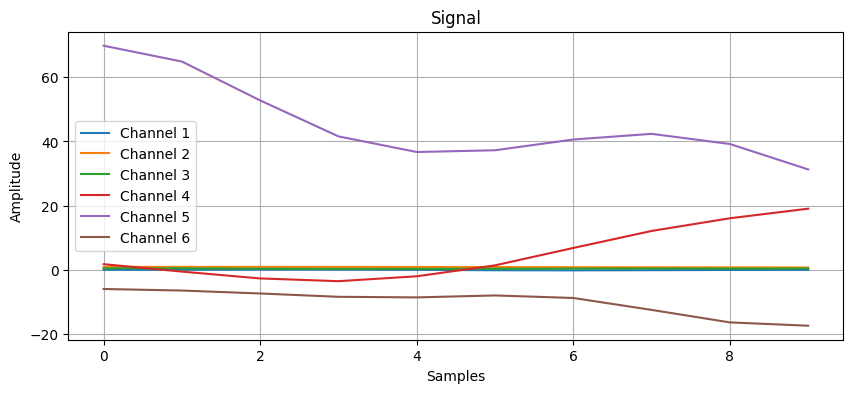

In [31]:
from caits.visualization import plot_signal

plot_signal(tmp_train.X[0].values, return_mode=False)

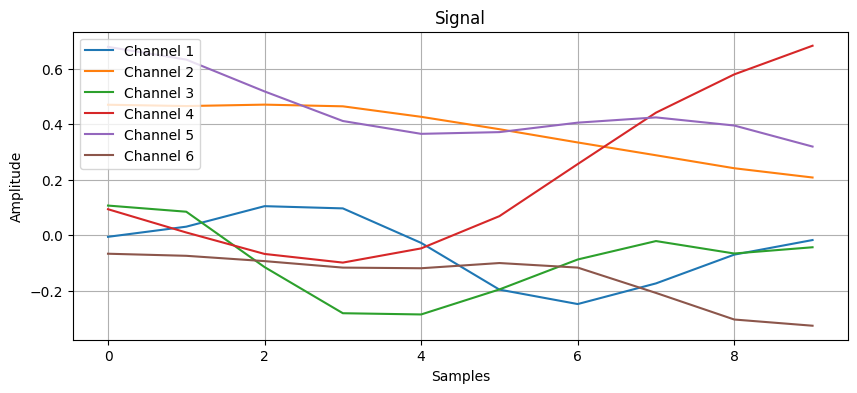

In [32]:
plot_signal(final_train.X[0].values, return_mode=False)


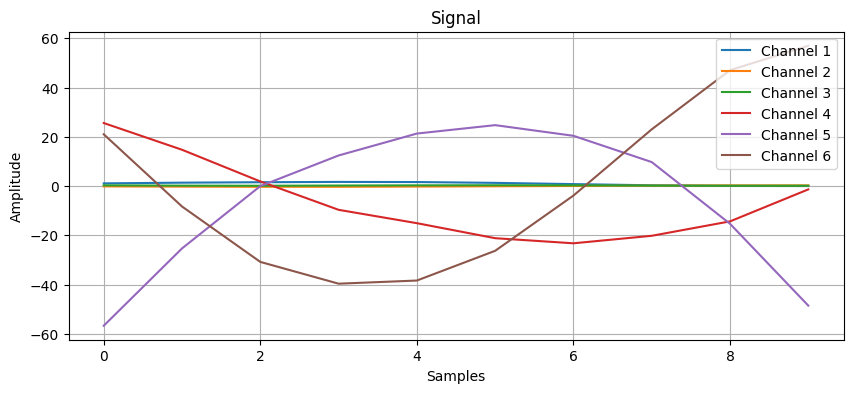

In [33]:
plot_signal(tmp_test.X[0].values, return_mode=False)


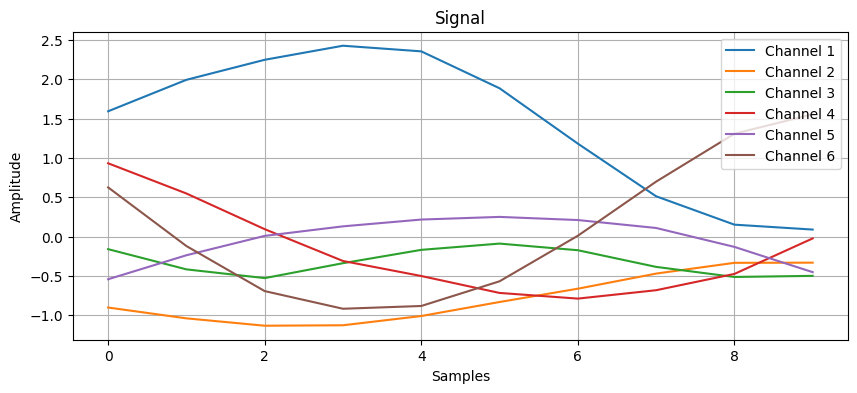

In [34]:
plot_signal(final_test.X[0].values, return_mode=False)


In [35]:
from sklearn.decomposition import PCA

pipeline2 = Pipeline(
    [
        ("conv", dataFlatten),
        ("scaler", SklearnWrapper(StandardScaler)),
        ("pca", SklearnWrapper(PCA, {"n_components": 2})),
    ]
)

tmp_pca_train = pipeline2.fit_transform(tmp_train)
tmp_pca_test = pipeline2.transform(tmp_test)

In [36]:
tmp_pca_train, tmp_pca_test, tmp_pca_train.X.shape, tmp_pca_test.X.shape

(DatasetList object with 20178 instances.,
 DatasetList object with 5045 instances.,
 (20178, 2),
 (5045, 2))

In [37]:
def plot_scatter_pca(
        arr: np.ndarray,
        c_name: str="y",
        cmap_set: str = "plasma"

):
    import matplotlib.pyplot as plt

    if arr.ndim == 2:
        plt.style.use('classic')
        plt.figure(figsize=(16, 8))
        plt.scatter(arr[:, 0], arr[:, 1], c=c_name, cmap=cmap_set)
        plt.xlabel('First principal component')
        plt.ylabel('Second Principal Component')

    elif arr.ndim == 3:
        plt.style.use('classic')
        fig = plt.figure(figsize=(16, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(arr[:, 0], arr[:, 1], arr[:, 2], c=c_name, cmap=cmap_set)
        ax.set_xlabel('First principal component')
        ax.set_ylabel('Second Principal Component')
        ax.set_zlabel('Third Principal Component')

    else:
        print("The DataFrame has more than 4 columns.")


/tmp/ipykernel_1499179/927769962.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(arr[:, 0], arr[:, 1], c=c_name, cmap=cmap_set)


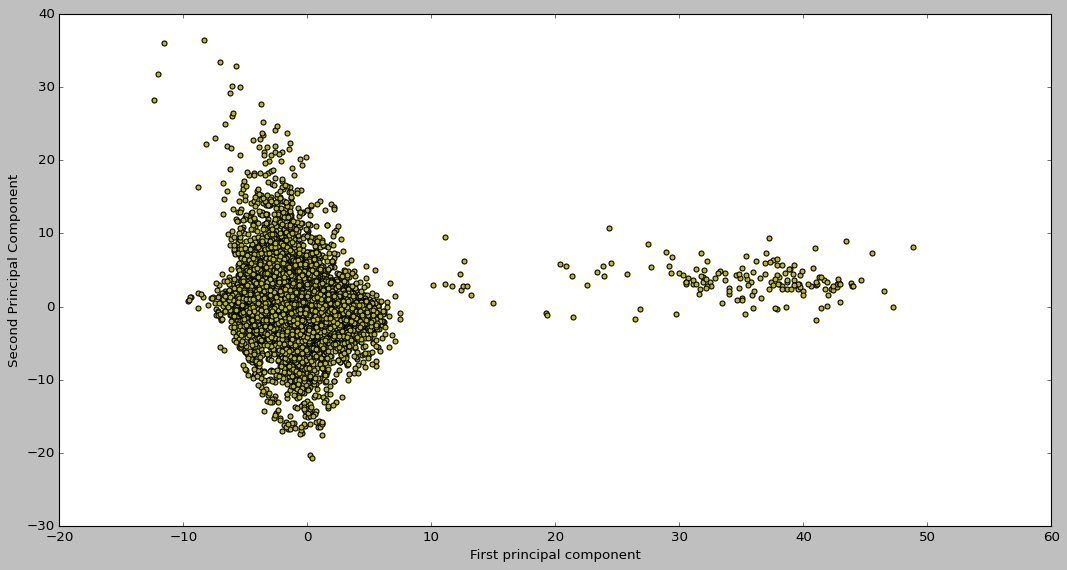

In [38]:
plot_scatter_pca(tmp_pca_train.X.values, cmap_set="viridis")

/tmp/ipykernel_1499179/927769962.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(arr[:, 0], arr[:, 1], c=c_name, cmap=cmap_set)


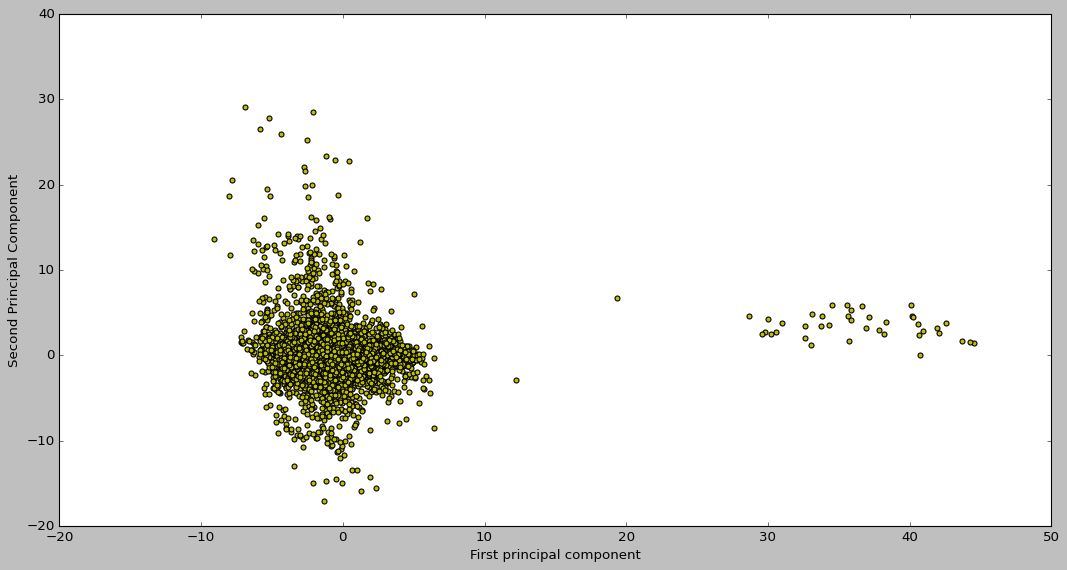

In [39]:
plot_scatter_pca(tmp_pca_test.X.values, cmap_set="viridis")

In [41]:
from caits.transformers._feature_extractor_v2 import FeatureExtractor
from caits.properties import magnitude_signal, sma_signal

mag_fe = FeatureExtractor(
    [
        {
            "func": magnitude_signal,
            "params": {
            }
        },
    ],
    axis=1,
    to_dataset=True
)

tmp_mag = mag_fe.fit_transform(datasetListObj)
tmp_mag

DatasetList object with 924 instances.

In [42]:
tmp_mag.X[0]

       magnitude_signal  
  0   54.91945688005299  
  1   58.84529213964359  
  2   67.64697223823103  
  3   64.30395109167088  
  4   56.88134258260788  
...                 ...  
204  122.11964154058101  
205   77.07662900646343  
206  45.704058517816556  
207   94.06382003724917  
208  126.92081497532232  

CaitsArray with shape (209, 1)

In [43]:
from caits.transformers._augment_singal import AugmentSignal
from caits.augmentation import add_noise_ts, time_warp_ts

augmentation_transformer = AugmentSignal(
    [
        {
            "func": time_warp_ts,
            "params": {
                "n_speed_change": 4
            }
        },
        {
            "func": add_noise_ts,
            "params": {
                "loc": 0,
                "scale": 1,
            }
        }
    ],
    repeats=2
)

In [44]:
augmented_tmp_train = augmentation_transformer.fit_transform(tmp_train)

In [45]:
tmp_train, augmented_tmp_train

(DatasetList object with 20178 instances.,
 DatasetList object with 60534 instances.)

In [57]:
len(tmp_train.X), len(tmp_train.y), len(tmp_train._id)

(20178, 20178, 20178)

In [58]:
len(augmented_tmp_train.X), len(augmented_tmp_train.y), len(augmented_tmp_train._id)

(40356, 40356, 40356)

In [59]:
tmp_train.X[0], augmented_tmp_train.X[0]

(   acc_x_axis_g  acc_y_axis_g  acc_z_axis_g  gyr_x_axis_deg/s  gyr_y_axis_deg/s  gyr_z_axis_deg/s  
 0        -0.039         0.862          0.43             1.707            69.878            -6.037  
 1        -0.013          0.86         0.419             -0.61            64.939            -6.524  
 2         0.039         0.864         0.327            -2.744            52.805            -7.439  
 3         0.033         0.859         0.251            -3.598            41.585            -8.476  
 4        -0.056         0.832          0.25            -2.073            36.707            -8.659  
 5        -0.177           0.8         0.292             1.341            37.256            -8.049  
 6        -0.215         0.766         0.341             6.768             40.61            -8.841  
 7        -0.163         0.733         0.371            12.073            42.378           -12.561  
 8        -0.089         0.699          0.35            16.037            39.207           

In [60]:
augmented_tmp_train.X[0], augmented_tmp_train.X[20178]

(   acc_x_axis_g  acc_y_axis_g  acc_z_axis_g  gyr_x_axis_deg/s  gyr_y_axis_deg/s  gyr_z_axis_deg/s  
 0        -0.039         0.862          0.43             1.707            69.878            -6.037  
 1        -0.013          0.86         0.419             -0.61            64.939            -6.524  
 2         0.039         0.864         0.327            -2.744            52.805            -7.439  
 3         0.033         0.859         0.251            -3.598            41.585            -8.476  
 4        -0.056         0.832          0.25            -2.073            36.707            -8.659  
 5        -0.177           0.8         0.292             1.341            37.256            -8.049  
 6        -0.215         0.766         0.341             6.768             40.61            -8.841  
 7        -0.163         0.733         0.371            12.073            42.378           -12.561  
 8        -0.089         0.699          0.35            16.037            39.207           

In [50]:
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer

# kwargs_dict = {
#     "output_distribution": "uniform",
#     "n_quantiles": 100
# }

pipe_sklearn = Pipeline(
    [
        ("flatten", dataFlatten),
        ("scaler", SklearnWrapper(MinMaxScaler)),
        ("quantile", SklearnWrapper(QuantileTransformer, {"output_distribution": "uniform", "n_quantiles": 100})),
        # ("quantile", SklearnWrapper(QuantileTransformer, **kwargs_dict)),
        # ("pca", SklearnWrapper(PCA, n_components=2)),
        ("unflatten", dataInverseFlatten)
    ]
)

In [51]:
train = pipe_sklearn.fit_transform(tmp_train)
test = pipe_sklearn.transform(tmp_test)

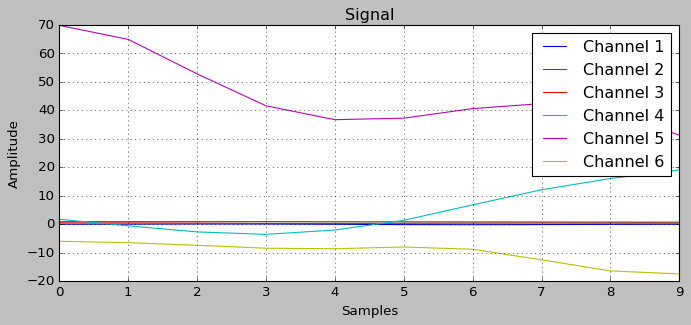

In [52]:
plot_signal(tmp_train.X[0].values, return_mode=False)

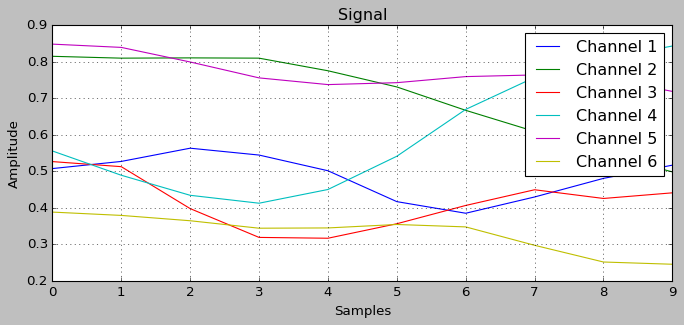

In [53]:
plot_signal(train.X[0].values, return_mode=False)

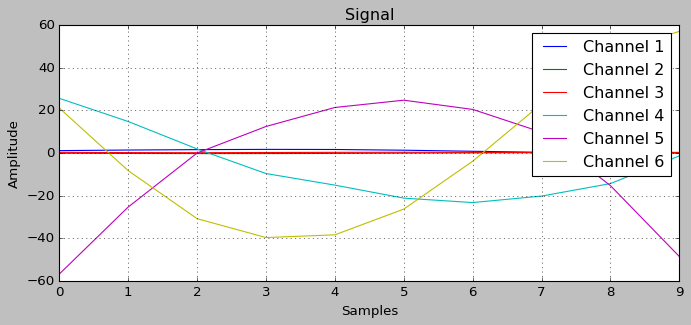

In [54]:
plot_signal(tmp_test.X[0].values, return_mode=False)

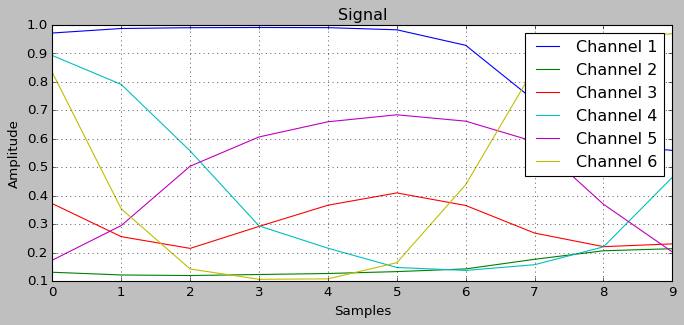

In [55]:
plot_signal(test.X[0].values, return_mode=False)

In [6]:
shuffled_dataset = datasetListObj.shuffle()

In [10]:
datasetListObj.X, datasetListObj

([     acc_x_axis_g  acc_y_axis_g  acc_z_axis_g  gyr_x_axis_deg/s  gyr_y_axis_deg/s  gyr_z_axis_deg/s  
    0          0.65         0.227         0.765           -48.293            -18.78           -18.171  
    1          0.85         0.175         0.649            -50.61            12.805           -27.134  
    2          0.98         0.134         0.507           -52.256            30.366           -30.366  
    3         1.118         0.101         0.406           -53.293            25.854             -25.0  
    4         1.243          0.09         0.356           -54.695              6.22           -14.268  
  ...           ...           ...           ...               ...               ...               ...  
  204          0.34         0.076         0.077            63.232           -70.061              77.5  
  205         0.917        -0.003         0.094            40.122           -54.939             36.22  
  206         1.341        -0.183         0.032             0.54

In [12]:
datasetListObj.y

['03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',


In [11]:
shuffled_dataset.X, shuffled_dataset

([    acc_x_axis_g  acc_y_axis_g  acc_z_axis_g  gyr_x_axis_deg/s  gyr_y_axis_deg/s  gyr_z_axis_deg/s  
   0        -0.673         0.651         0.405           -12.134           -18.598            -5.366  
   1        -0.634         0.718         0.303           -18.171           -20.305            -2.439  
   2        -0.604         0.763         0.254            -23.11           -25.427             0.305  
   3        -0.628         0.767         0.225           -24.878            -33.11             1.768  
   4        -0.644         0.758         0.259            -23.72            -36.22             1.524  
  ...           ...           ...           ...               ...               ...               ...  
  85        -0.382         0.722         0.483             1.463          -216.585             8.963  
  86        -0.374         0.704         0.524             0.488          -213.537             1.646  
  87        -0.281         0.713         0.625             2.256        

In [13]:
shuffled_dataset.y

['02a',
 '01e',
 '03a',
 '01e',
 '02a',
 '03a',
 '03a',
 '03a',
 '01d',
 '01e',
 '03a',
 '01d',
 '02a',
 '01d',
 '03a',
 '03a',
 '01d',
 '03a',
 '01e',
 '03a',
 '01e',
 '02a',
 '01e',
 '02a',
 '02a',
 '03a',
 '02a',
 '01d',
 '01e',
 '01e',
 '01e',
 '02a',
 '03a',
 '01d',
 '01e',
 '01d',
 '03a',
 '02a',
 '01e',
 '03a',
 '01e',
 '01d',
 '01d',
 '02a',
 '01d',
 '01d',
 '03a',
 '01e',
 '03a',
 '01d',
 '03a',
 '02a',
 '01e',
 '01e',
 '02a',
 '01d',
 '01e',
 '01e',
 '01d',
 '03a',
 '03a',
 '01e',
 '02a',
 '01d',
 '03a',
 '01d',
 '01d',
 '01e',
 '01e',
 '03a',
 '03a',
 '01d',
 '03a',
 '01d',
 '01e',
 '03a',
 '01e',
 '02a',
 '01e',
 '01e',
 '03a',
 '01d',
 '01e',
 '01e',
 '03a',
 '01d',
 '01e',
 '02a',
 '01d',
 '03a',
 '01e',
 '01e',
 '02a',
 '01e',
 '03a',
 '02a',
 '03a',
 '02a',
 '01e',
 '01e',
 '01d',
 '01d',
 '03a',
 '01e',
 '01e',
 '01e',
 '02a',
 '03a',
 '02a',
 '01d',
 '01e',
 '03a',
 '01d',
 '01d',
 '01e',
 '01e',
 '01d',
 '01e',
 '02a',
 '01d',
 '01d',
 '01d',
 '01d',
 '01d',
 '01d',
